# Matplotlib 한글 폰트 설정

In [3]:
# Initial Setting (font, display)
!sudo apt-get install -y fonts-nanum # 글씨체 다운로드
!sudo fc-cache -fv # 폰트 리스트 갱신
!rm ~/.cache/matplotlib -rf

import matplotlib.pyplot as plt
plt.rc('font',family='NanumBarunGothic')

import matplotlib
get_ipython().run_line_magic('config',"InlineBackend.figure_format='retina'") # 화질보정

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 40 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 2s (5,188 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 160837 files and d

# 헬스 갤러리 크롤링

## Packages for data crawling

In [4]:
!pip install bs4 # 파이썬 크롤링 크롤러 설치 : Beautifulsoup
!pip install lxml # html parser

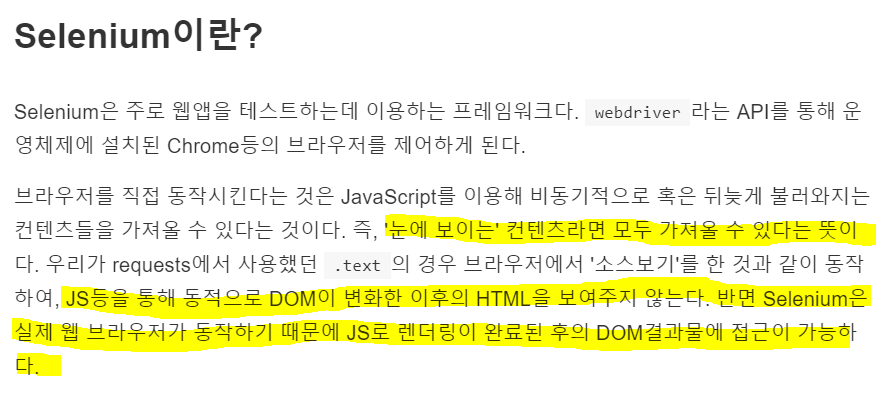

In [5]:
!pip install selenium

     |████████████████████████████████| 904 kB 8.0 MB/s 


In [6]:
#Packages for data crawling

from selenium import webdriver # 디바이스에 설치된 브라우저들을 제어할 수 있다.
from urllib.request import urlopen
from bs4 import BeautifulSoup as bs
from selenium.webdriver.common.keys import Keys
import time
import sys
import requests

# colab에서 selenium을 사용하기 위해서는 지정해줘야하는 부분
!apt-get update
!apt install chromium-chromedriver # 크롬 드라이버 설치

Get:1 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Ign:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Ign:3 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Get:4 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release [697 B]
Hit:5 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Get:6 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release.gpg [836 B]
Hit:7 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:8 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease [15.9 kB]
Get:9 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Get:10 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ Packages [62.9 kB]
Get:11 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Hit:13 http://ppa.launchpad.net/cran/

## 데이터 크롤링

In [7]:
url='https://gall.dcinside.com/board/lists/?id=extra&page=1&search_pos=-13291241&s_type=search_subject_memo&s_keyword='
search_keyword='프로틴' # 검색어 지정

url=url+search_keyword # 어떤 정보를 가져올지 url 생성


options=webdriver.ChromeOptions()
options.add_argument('--headless')
options.add_argument('--no-sandbox')
options.add_argument("--single-process")
options.add_argument("--window-size=1920,1080")
options.add_argument("--disable-dev-shm-usage")
options.add_argument("disable-gpu")

options.add_argument("user-agent=Mozilla/5.0 (Macintosh; Intel Mac OS X 10_12_6) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/61.0.3163.100 Safari/537.36")
driver=webdriver.Chrome('chromedriver',options=options)

delay_time=0.5
driver.implicitly_wait(delay_time)

driver.get(url)
print('complete : get url')

complete : get url


In [8]:
import pandas as pd

In [9]:
# Data Crawling ( 헬스 게시글 데이터 )
health_data=pd.DataFrame(columns=['post']) # 데이터를 담을 데이터 프레임 생성

# 게시글 
# info =driver.find_elements_by_xpath('/html/body/div[2]/div[2]/main/section[1]/article[2]/div[3]/table/tbody/tr[9]/td[2]')
    
# info2=driver.find_elements_by_xpath('/html/body/div[2]/div[2]/main/section[1]/article[2]/div[3]/table/tbody/tr[8]/td[2]')
# print(info2.text)


In [18]:
info=driver.find_elements_by_xpath('/html/body/div[2]/div[2]/main/section[1]/article[2]/div[3]/table/tbody/tr')
for n in info:
  print(n.text)
  n.send_keys(Keys.ENTER)
  try:
    post=driver.find_element_by_xpath("/html/body/div[2]/div[2]/main/section/article[2]/div[1]/header/div/h3/span[2]")
    print(post)
    print('pass')
  except:
    print('error')

13349619 아니 근데 식단 바꿔봤는데도 왜 살이 안빠지냐 [3] 아니(122.43) 07.28 62 0


ElementNotInteractableException: ignored